In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose


In [5]:
df = pd.read_csv("/content/BrentOilPrices.csv")
df["Date"] = pd.to_datetime(df["Date"], format="mixed", dayfirst=True)
df = df.sort_values("Date").reset_index(drop=True)

print(df.head())
print(df.info())


        Date  Price
0 1987-05-20  18.63
1 1987-05-21  18.45
2 1987-05-22  18.55
3 1987-05-25  18.60
4 1987-05-26  18.63
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9011 non-null   datetime64[ns]
 1   Price   9011 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 140.9 KB
None


In [6]:
print(df.isna().sum())
df["Price"] = df["Price"].ffill()

Date     0
Price    0
dtype: int64


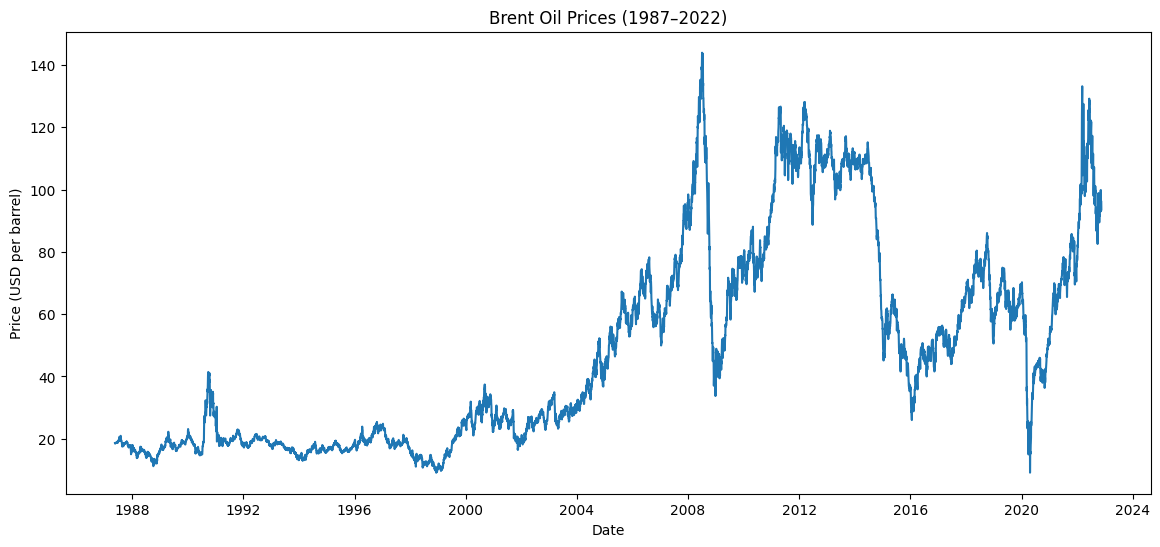

In [7]:
plt.figure(figsize=(14, 6))
plt.plot(df["Date"], df["Price"])
plt.title("Brent Oil Prices (1987–2022)")
plt.xlabel("Date")
plt.ylabel("Price (USD per barrel)")
plt.show()

In [8]:
df["LogPrice"] = np.log(df["Price"])
df["LogReturn"] = df["LogPrice"].diff()

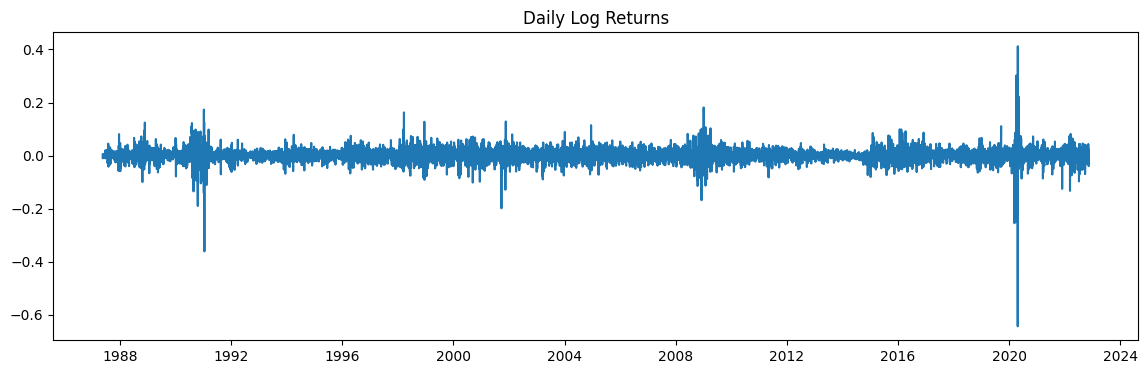

In [9]:
plt.figure(figsize=(14, 4))
plt.plot(df["Date"], df["LogReturn"])
plt.title("Daily Log Returns")
plt.show()


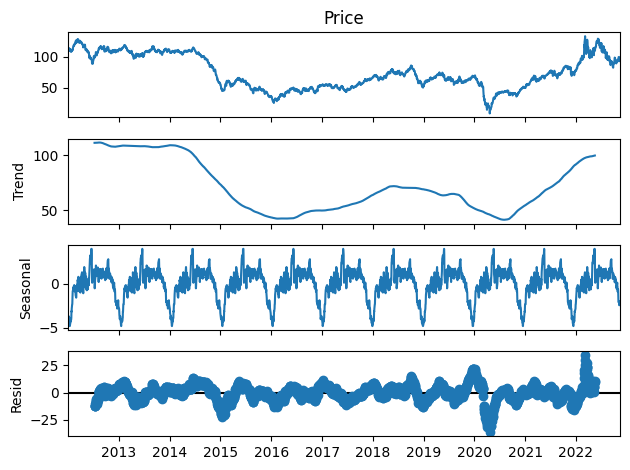

In [10]:
df_recent = df[df["Date"] >= "2012-01-01"].set_index("Date")

decomposition = seasonal_decompose(df_recent["Price"], model="additive", period=252)

decomposition.plot()
plt.show()


In [11]:
def adf_test(series, name=""):
    result = adfuller(series.dropna())
    print(f"ADF Test ({name})")
    print(f"Test Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}\n")

adf_test(df["Price"], "Price")
adf_test(df["LogReturn"], "Log Return")


ADF Test (Price)
Test Statistic: -1.9939
p-value: 0.2893

ADF Test (Log Return)
Test Statistic: -16.4271
p-value: 0.0000



In [12]:
def kpss_test(series, name=""):
    statistic, p_value, _, _ = kpss(series.dropna(), regression="c", nlags="auto")
    print(f"KPSS Test ({name})")
    print(f"Test Statistic: {statistic:.4f}")
    print(f"p-value: {p_value:.4f}\n")

kpss_test(df["Price"], "Price")
kpss_test(df["LogReturn"], "Log Return")


KPSS Test (Price)
Test Statistic: 9.5588
p-value: 0.0100

KPSS Test (Log Return)
Test Statistic: 0.0343
p-value: 0.1000



/tmp/ipython-input-371696701.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, _, _ = kpss(series.dropna(), regression="c", nlags="auto")
/tmp/ipython-input-371696701.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, _, _ = kpss(series.dropna(), regression="c", nlags="auto")


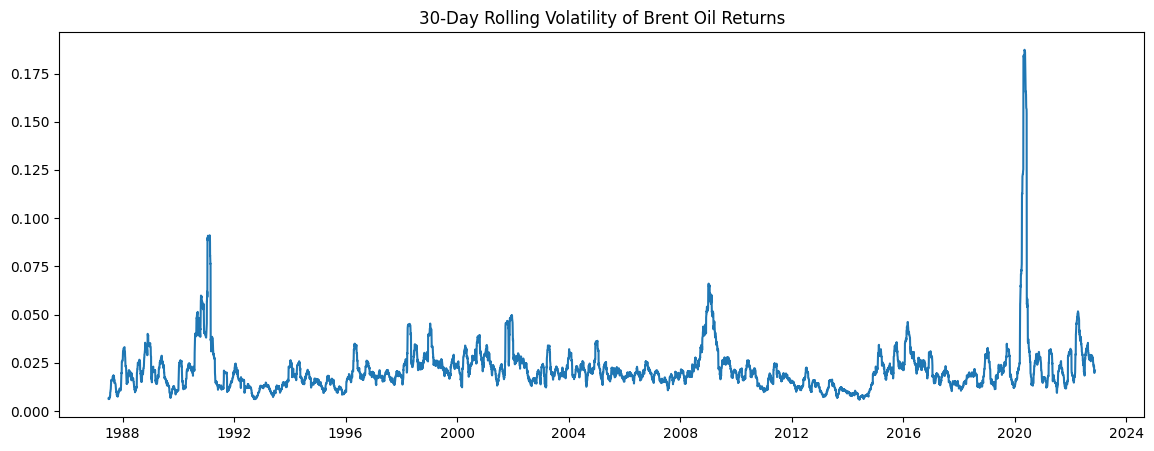

In [13]:
df["RollingVolatility"] = df["LogReturn"].rolling(window=30).std()

plt.figure(figsize=(14, 5))
plt.plot(df["Date"], df["RollingVolatility"])
plt.title("30-Day Rolling Volatility of Brent Oil Returns")
plt.show()


In [14]:
events_data = {
    "Date": [
        "2011-02-15", "2014-11-27", "2015-07-14", "2016-01-16",
        "2018-05-08", "2020-03-06", "2020-03-11", "2020-04-12",
        "2022-02-24", "2022-03-08", "2022-10-05"
    ],
    "Event": [
        "Arab Spring uprisings begin",
        "OPEC decides not to cut oil production",
        "Iran nuclear deal signed",
        "Iran sanctions lifted",
        "US withdraws from Iran nuclear deal",
        "OPEC+ talks collapse",
        "WHO declares COVID-19 a pandemic",
        "OPEC+ historic production cut",
        "Russia invades Ukraine",
        "US bans Russian oil imports",
        "OPEC+ announces production cuts"
    ],
    "Category": [
        "Geopolitical Conflict", "OPEC Policy", "Sanctions", "Sanctions",
        "Sanctions", "Price War", "Global Shock", "OPEC Policy",
        "Geopolitical Conflict", "Sanctions", "OPEC Policy"
    ]
}

events_df = pd.DataFrame(events_data)
events_df["Date"] = pd.to_datetime(events_df["Date"])


events_df.to_csv("oil_market_events.csv", index=False)

events_df


,Date,Event,Category
0,2011-02-15,Arab Spring uprisings begin,Geopolitical Conflict
1,2014-11-27,OPEC decides not to cut oil production,OPEC Policy
2,2015-07-14,Iran nuclear deal signed,Sanctions
3,2016-01-16,Iran sanctions lifted,Sanctions
4,2018-05-08,US withdraws from Iran nuclear deal,Sanctions
5,2020-03-06,OPEC+ talks collapse,Price War
6,2020-03-11,WHO declares COVID-19 a pandemic,Global Shock
7,2020-04-12,OPEC+ historic production cut,OPEC Policy
8,2022-02-24,Russia invades Ukraine,Geopolitical Conflict
9,2022-03-08,US bans Russian oil imports,Sanctions


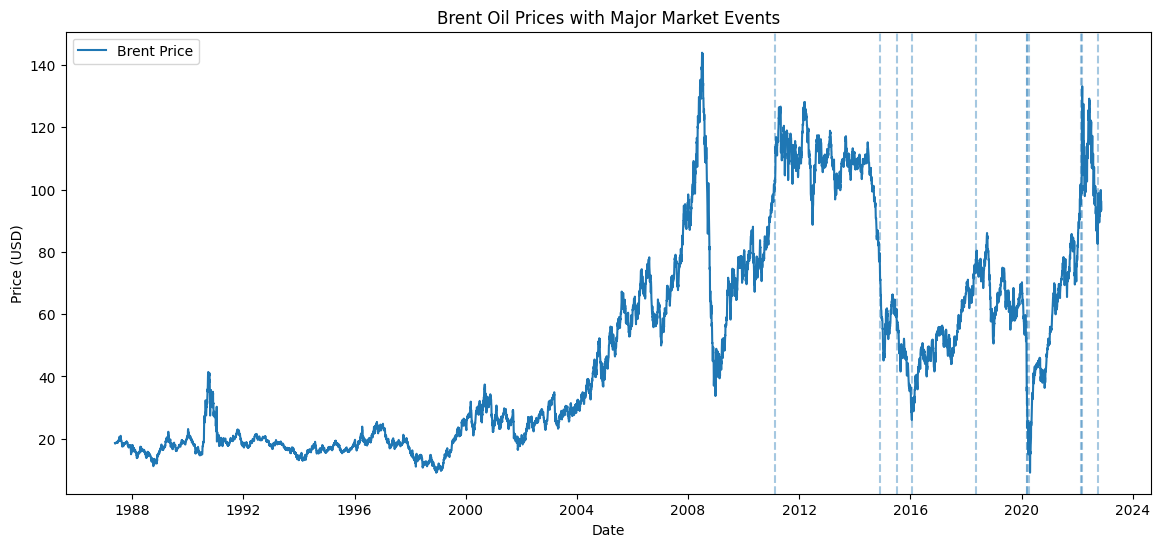

In [15]:
plt.figure(figsize=(14, 6))
plt.plot(df["Date"], df["Price"], label="Brent Price")

for _, row in events_df.iterrows():
    plt.axvline(row["Date"], linestyle="--", alpha=0.4)

plt.title("Brent Oil Prices with Major Market Events")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


## Task 1: Data Analysis Workflow

This analysis follows a structured workflow to understand how major geopolitical and economic events affect Brent oil prices.

### Step 1: Data Loading and Cleaning
Historical daily Brent oil prices are loaded from CSV files. The Date column is converted to datetime format, the data is sorted chronologically, and missing values are handled to ensure consistency.

### Step 2: Exploratory Data Analysis (EDA)
Initial visualizations are created to observe long-term price trends, major spikes, and periods of instability. Log prices and returns are computed to stabilize variance and support statistical analysis.

### Step 3: Time Series Diagnostics
Trend behavior, stationarity, and volatility patterns are analyzed using rolling statistics and formal statistical tests. These properties guide the choice of modeling approach.

### Step 4: Event Data Compilation
A structured dataset of major geopolitical events, OPEC decisions, and global economic shocks is compiled and aligned with the price timeline for interpretative analysis.

### Step 5: Change Point Modeling (Planned)
Bayesian change point models will be applied to detect structural breaks in oil prices and quantify changes in statistical regimes.

### Step 6: Insight Generation and Communication
Detected change points will be interpreted in relation to real-world events and translated into insights for investors, policymakers, and energy companies.


## Assumptions and Limitations

### Assumptions
- Brent oil prices reflect global oil market dynamics.
- Structural breaks in the time series may align with major geopolitical or economic events.
- Market reactions are assumed to occur within a short time window around event dates.

### Limitations
- Change point analysis identifies statistical shifts, not causal relationships.
- Multiple overlapping events may influence prices simultaneously.
- Market expectations may price in events before their official dates.
- Other drivers such as currency fluctuations, speculation, and demand changes are not explicitly modeled.

### Correlation vs Causation
While change point detection can identify statistically significant changes in oil price behavior, it does not prove that a specific event caused the change. The analysis establishes temporal correlation rather than causal impact. Establishing causality would require structural economic modeling or controlled experimental designs, which are beyond the scope of this study.
